# PyTorch Generic Examples
#### This is a practice of what's on https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
#### Data is from http://archive.ics.uci.edu/ml/datasets/Heart+Disease
#### & http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
#### (processed.cleveland.data)

In [8]:
# Read data
import pandas as pd
import numpy as np

Data = pd.read_csv('processed.cleveland.data', header=None, usecols=range(0,14),
                     names=['age',   'sex',     'cp',      'trestbps', 'chol',
                            'fbs',   'restecg', 'thalach', 'exang',    'oldpeak',
                            'slope', 'ca',      'thal',    'hd'])

# If 'hd' is not zero, consider the patient has heart disease.
Data.loc[Data['hd']!=0,'hd']= 1

# 'ca' and 'thal' have '?'. Convert this to np.nan to impute later
Data.loc[Data.ca=='?','ca']=np.nan
Data.loc[Data.thal=='?','thal']=np.nan

# Cursory check
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
# Impute data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select complete data.
Data_Complete = Data[(Data['ca'].notna()) & (Data['thal'].notna())]
# Have the imputer ready.
imp = IterativeImputer(max_iter=10, random_state=2580)
imp.fit(Data_Complete)
# Impute the missing data.
Data_Missing = imp.transform(Data[(Data['ca'].isna()) | (Data['thal'].isna())])
Data_Missing = pd.DataFrame(data = Data_Missing,
                            columns =['age',   'sex',     'cp',      'trestbps', 'chol',
                                      'fbs',   'restecg', 'thalach', 'exang',    'oldpeak',
                                      'slope', 'ca',      'thal',    'hd'])
# Combine Complete and Missing
Data_Imputed = pd.concat([Data_Complete, Data_Missing]).reset_index(drop=True)
Data_Imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0


In [10]:
# Check the number of unique values of each feature. Small numbers like 2 or 3 mean they are factors.
columnId = 0
for i in Data_Imputed.columns.tolist():
    print(columnId, i, Data_Imputed[i].nunique())
    columnId = columnId+1

0 age 41
1 sex 2
2 cp 4
3 trestbps 50
4 chol 152
5 fbs 2
6 restecg 3
7 thalach 91
8 exang 2
9 oldpeak 40
10 slope 3
11 ca 9
12 thal 7
13 hd 2


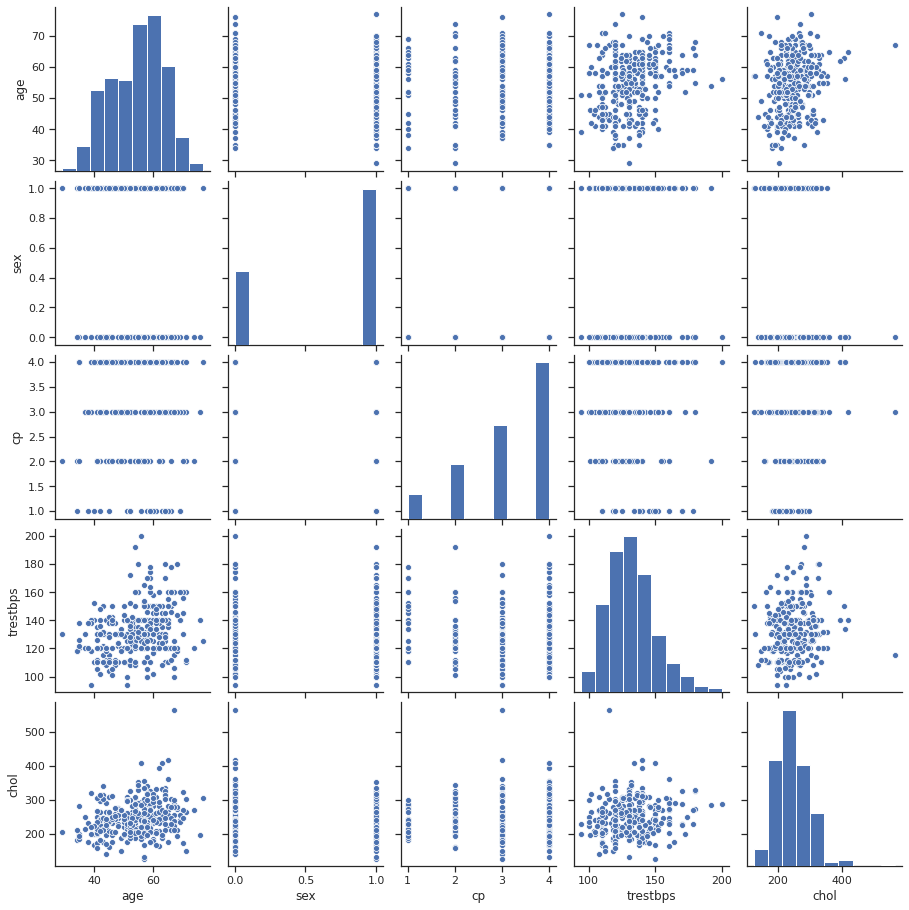

In [11]:
# Matrix plot
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# get a few columns of BCdata.
Data_small = Data.iloc[:,:5]
g = sns.pairplot(Data_small)

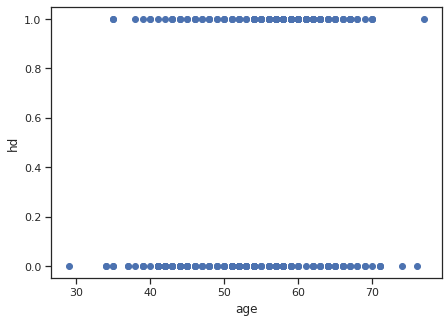

In [12]:
# Plot 'heart disease'(y) vs 'age'(x)
import matplotlib.pyplot as plt

x=Data['age']
y=Data['hd']

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('hd')
plt.show()

## 1. How to Confirm PyTorch Is Installed

In [15]:
# PyTorch version check
import torch
print(torch.__version__)

1.6.0+cpu


## 2. PyTorch Deep Learning Model Life-Cycle

In this section, you will discover the life-cycle for a deep learning model and the PyTorch API that you can use to define models.

A model has a life-cycle, and this very simple knowledge provides the backbone for both modeling a dataset and understanding the PyTorch API.

The five steps in the life-cycle are as follows:

- 1. Prepare the Data.
- 2. Define the Model.
- 3. Train the Model.
- 4. Evaluate the Model.
- 5. Make Predictions.

Let’s take a closer look at each step in turn.

<b>Note</b>: There are many ways to achieve each of these steps using the PyTorch API, although I have aimed to show you the simplest, or most common, or most idiomatic.

If you discover a better approach, let me know in the comments below.

### Step 1: Prepare the Data

The first step is to load and prepare your data.

Neural network models require numerical input data and numerical output data.

You can use standard Python libraries to load and prepare tabular data, like CSV files. For example, Pandas can be used to load your CSV file, and tools from scikit-learn can be used to encode categorical data, such as class labels.

PyTorch provides the [Dataset class](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) that you can extend and customize to load your dataset.

For example, the constructor of your dataset object can load your data file (e.g. a CSV file). You can then override the <i>\__len__\()</i> function that can be used to get the length of the dataset (number of rows or samples), and the <i>\__getitem__\()</i> function that is used to get a specific sample by index.

When loading your dataset, you can also perform any required transforms, such as scaling or encoding.

Once loaded, PyTorch provides the [DataLoader class](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) to navigate a Dataset instance during the training and evaluation of your model.

A <i>DataLoader</i> instance can be created for the training dataset, test dataset, and even a validation dataset.

The [random_split()](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split) function can be used to split a dataset into train and test sets. Once split, a selection of rows from the Dataset can be provided to a DataLoader, along with the batch size and whether the data should be shuffled every epoch. Once defined, a <i>DataLoader</i> can be enumerated, yielding one batch worth of samples each iteration.

### Step 2: Define the Model

The next step is to define a model.

The idiom for defining a model in PyTorch involves defining a class that extends the [Module class](https://pytorch.org/docs/stable/nn.html#module).

The constructor of your class defines the layers of the model and the forward() function is the override that defines how to forward propagate input through the defined layers of the model.

Many layers are available, such as [Linear](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) for fully connected layers, [Conv2d](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) for convolutional layers, and [MaxPool2d](https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d) for pooling layers.

Activation functions can also be defined as layers, such as [ReLU](https://pytorch.org/docs/stable/nn.html#torch.nn.ReLU), [Softmax](https://pytorch.org/docs/stable/nn.html#torch.nn.Softmax), and [Sigmoid](https://pytorch.org/docs/stable/nn.html#torch.nn.Sigmoid).

The weights of a given layer can also be initialized after the layer is defined in the constructor.

Common examples include the [Xavier](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.xavier_uniform_) and [He weight](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.kaiming_uniform_) initialization schemes.

### Step 3: Train the Model

The training process requires that you define a loss function and an optimization algorithm.

Common loss functions include the following:

- [BCELoss](https://pytorch.org/docs/stable/nn.html#torch.nn.BCELoss): Binary cross-entropy loss for binary classification.
- [CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss): Categorical cross-entropy loss for multi-class classification.
- [MSELoss](https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss): Mean squared loss for regression.

For more on loss functions generally, see the tutorial:

- [Loss and Loss Functions for Training Deep Learning Neural Networks](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/)

Stochastic gradient descent is used for optimization, and the standard algorithm is provided by the [SGD class](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD), although other versions of the algorithm are available, such as [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam).

Training the model involves enumerating the <i>DataLoader</i> for the training dataset.

First, a loop is required for the number of training epochs. Then an inner loop is required for the mini-batches for stochastic gradient descent.

Each update to the model involves the same general pattern comprised of:

- Clearing the last error gradient.
- A forward pass of the input through the model.
- Calculating the loss for the model output.
- Backpropagating the error through the model.
- Update the model in an effort to reduce loss.

### Step 4: Evaluate the model
Once the model is fit, it can be evaluated on the test dataset.

This can be achieved by using the <i>DataLoader</i> for the test dataset and collecting the predictions for the test set, then comparing the predictions to the expected values of the test set and calculating a performance metric.

### Step 5: Make predictions
A fit model can be used to make a prediction on new data.

For example, you might have a single image or a single row of data and want to make a prediction.

This requires that you wrap the data in a [PyTorch Tensor](https://pytorch.org/docs/stable/tensors.html) data structure.

A Tensor is just the PyTorch version of a NumPy array for holding data. It also allows you to perform the automatic differentiation tasks in the model graph, like calling backward() when training the model.

The prediction too will be a Tensor, although you can retrieve the NumPy array by [detaching the Tensor](https://pytorch.org/docs/stable/autograd.html#torch.Tensor.detach) from the automatic differentiation graph and calling the NumPy function.

Now that we are familiar with the PyTorch API at a high-level and the model life-cycle, let’s look at how we can develop some standard deep learning models from scratch.

## 3. How to Develop PyTorch Deep Learning Models

In this section, you will discover how to develop, evaluate, and make predictions with standard deep learning models, including Multilayer Perceptrons (MLP) and Convolutional Neural Networks (CNN).

A Multilayer Perceptron model, or MLP for short, is a standard fully connected neural network model.

It is comprised of layers of nodes where each node is connected to all outputs from the previous layer and the output of each node is connected to all inputs for nodes in the next layer.

An MLP is a model with one or more fully connected layers. This model is appropriate for tabular data, that is data as it looks in a table or spreadsheet with one column for each variable and one row for each variable. There are three predictive modeling problems you may want to explore with an MLP; they are binary classification, multiclass classification, and regression.

Let’s fit a model on a real dataset for each of these cases.

<b>Note</b>: The models in this section are effective, but not optimized. See if you can improve their performance. Post your findings in the comments below.

### 3.1. How to Develop an MLP for Binary Classification

We will use the Ionosphere binary (two class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether there is a structure in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more about it here.

- [Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv).
- [Ionosphere Dataset Description](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names).

We will use a [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to encode the string labels to integer values 0 and 1. The model will be fit on 67 percent of the data, and the remaining 33 percent will be used for evaluation, split using the [train_test_split() function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

It is a good practice to use <i>'relu'</i> activation with a <i>'He Uniform'</i> weight initialization. This combination goes a long way to overcome the problem of [vanishing gradients](https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/) when training deep neural network models. For more on ReLU, see the tutorial:

- [A Gentle Introduction to the Rectified Linear Unit (ReLU)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

The model predicts the probability of class 1 and uses the sigmoid activation function. The model is optimized using stochastic gradient descent and seeks to minimize the [binary cross-entropy loss](https://machinelearningmastery.com/cross-entropy-for-machine-learning/).

The complete example is listed below.

In [43]:
# pytorch mlp for binary classification
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer *******************************
        self.hidden1 = Linear(n_inputs, 10)    # Applies a linear transformation to the incoming data
                                               # n_inputs features going in, 10 features going out.
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
                                               # Fills the input Tensor with values according to the He initialization.
                                               # nonlinearity – the non-linear function (nn.functional name), 
                                               #                recommended to use only with 'relu' or 'leaky_relu' (default).
        self.act1 = ReLU()                     # Applies the rectified linear unit function element-wise.
        # second hidden layer ***************************************
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output *****************************
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer *******************************
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer ***************************************
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output *****************************
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])             # A multi-dimensional matrix containing elements of a single data type.
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()    # This separates the answer prediction from the gradient function 'grad_fn' info.
    return yhat

# prepare the data
#path = 'processed.cleveland.data.allnum'
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))

# define the network
#model = MLP(13)    # 13 predictors for 1 target.
model = MLP(34)    # 34 predictors for 1 target.

# train the model
train_model(train_dl, model)

# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)

# make a single prediction (expect class=1)
#row = [63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0]
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = predict(row, model)
print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

235 116
Accuracy: 0.905
Predicted: 0.998 (class=1)


Running the example first reports the shape of the train and test datasets, then fits the model and evaluates it on the test dataset. Finally, a prediction is made for a single row of data.

<b>Note</b>: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.